In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
X_test.shape

(10000, 28, 28)

In [45]:
single_image= X_train[0]

In [46]:
single_image.shape

(28, 28)

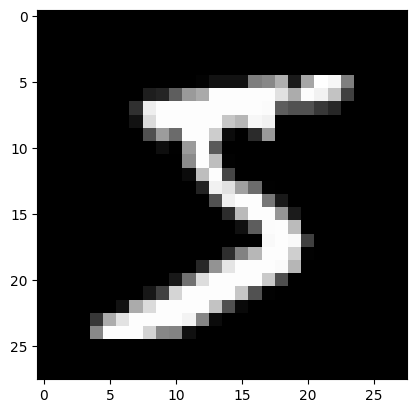

In [47]:
plt.imshow(single_image,cmap='gray')

In [48]:
y_train.shape

(60000,)

In [49]:
X_train.min()

0

In [50]:
X_train.max()

255

In [51]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [52]:
X_train_scaled.min()

0.0

In [53]:
X_train_scaled.max()

1.0

In [54]:
y_train[0]

5

In [55]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [56]:
type(y_train_onehot)

numpy.ndarray

In [57]:
y_train_onehot.shape

(60000, 10)

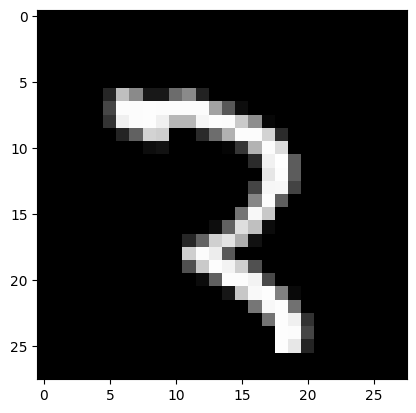

In [58]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [59]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [60]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [61]:
model = Sequential([layers.Input(shape=(28,28,1)),
                  layers.Conv2D(filters=34,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Flatten(),
                  layers.Dense(8,activation='relu'),
                  layers.Dense(10,activation='softmax')
                  ])


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 34)        884       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 34)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6664)              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 53320     
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 54294 (212.09 KB)
Trainable params: 54294 (212.09 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [63]:
# Choose the appropriate parameters
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [64]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.4475 - accuracy: 0.8615 - val_loss: 0.1387 - val_accuracy: 0.9615
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.1228 - accuracy: 0.9633 - val_loss: 0.0899 - val_accuracy: 0.9703
Epoch 3/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0836 - accuracy: 0.9754 - val_loss: 0.0673 - val_accuracy: 0.9801
Epoch 4/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0607 - val_accuracy: 0.9809
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0554 - accuracy: 0.9833 - val_loss: 0.0582 - val_accuracy: 0.9821


In [65]:
metrics = pd.DataFrame(model.history.history)

In [66]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.447470,0.861467,0.138725,0.9615
1,0.122812,0.963300,0.089898,0.9703
2,0.083591,0.975383,0.067301,0.9801
3,0.065687,0.979850,0.060692,0.9809
4,0.055413,0.983317,0.058153,0.9821


<Axes: >

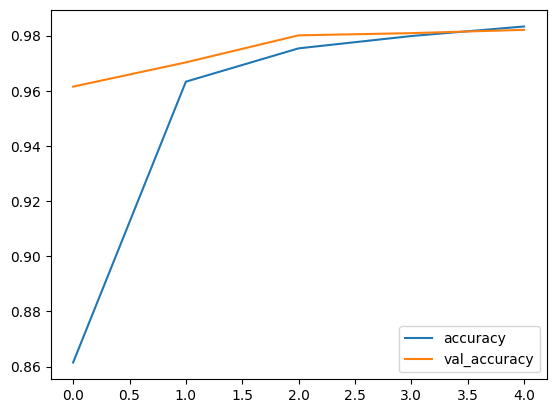

In [67]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

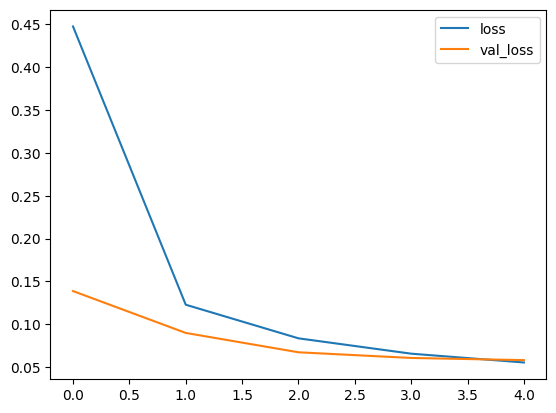

In [68]:
metrics[['loss','val_loss']].plot()

In [69]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [70]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 971    0    1    1    0    1    2    0    4    0]
 [   0 1121    5    1    1    1    3    0    3    0]
 [   3    0 1018    1    0    0    0    6    4    0]
 [   0    0    2 1000    0    5    0    1    2    0]
 [   0    3    6    0  960    0    1    1    0   11]
 [   2    0    0    4    0  885    1    0    0    0]
 [   7    2    0    0    1    7  939    0    2    0]
 [   0    3   10    4    0    1    0 1003    2    5]
 [   7    0    6    2    1    2    0    3  951    2]
 [   3    3    0    8    5    3    0    6    8  973]]


In [71]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [72]:
img = image.load_img('img.png')

In [73]:
type(img)

PIL.Image.Image

In [74]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [75]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 15ms/step


In [76]:
print(x_single_prediction)

[0]


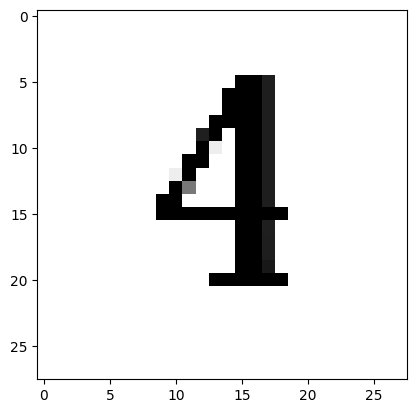

In [77]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [78]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [79]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 15ms/step


In [80]:
print(x_single_prediction)

[4]
